# K Nearest Neighbors

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [50]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
categories = iris['species'].unique()  
print(categories)

['setosa' 'versicolor' 'virginica']


In [52]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

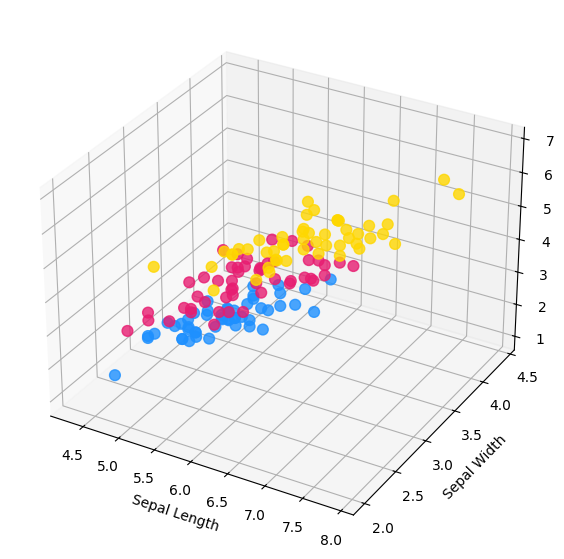

In [53]:
categories = iris.species.unique()  

color_list = []
for i in iris['species']:
    if i == categories[0]:
        color_list.append(color_blue_light)
    elif i == categories[1]:
        color_list.append(color_pink)
    else:
        color_list.append(color_gold)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=color_list, alpha=0.8, s=60)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()


In [54]:
y = iris['species']
X = iris.drop('species', axis=1)



# Feature Preprocessing - Standardization

In [55]:
# Standardize the features
X_std = (X - X.mean()) / X.std()


In [56]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42, stratify=y) # Remove stratify=y to see the difference

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


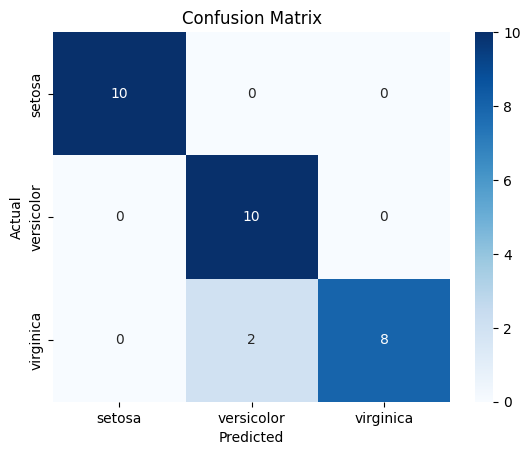

In [58]:
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature preprocessing - Normalization

In [59]:
# Normalize the features using min-max normalization
# This scales all features to the range [0,1]
# Formula: X_normalized = (X - X.min()) / (X.max() - X.min())
X_norm = (X - X.min()) / (X.max() - X.min())

# Split the data into training (80%) and testing (20%) sets
# stratify=y ensures that the class distribution is preserved in both sets
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, stratify=y)

# Create a KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the normalized training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate and print the classification accuracy
# Accuracy = (number of correct predictions) / (total number of predictions)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


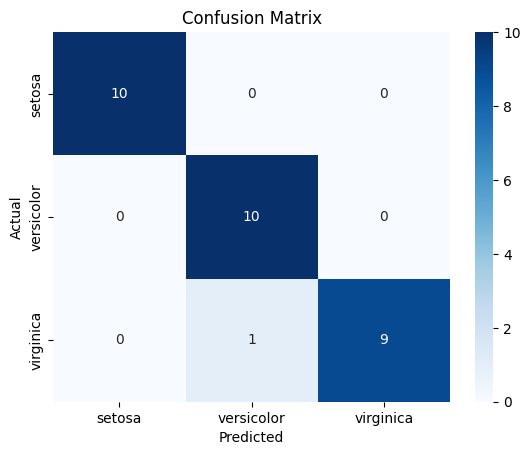

In [60]:
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Choosing K

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)                                                             

print("Best K:", knn_cv.best_params_['n_neighbors'])
print("Internal Accuracy:", knn_cv.best_score_)

Best K: 7
Internal Accuracy: 0.975


In [65]:
best_knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


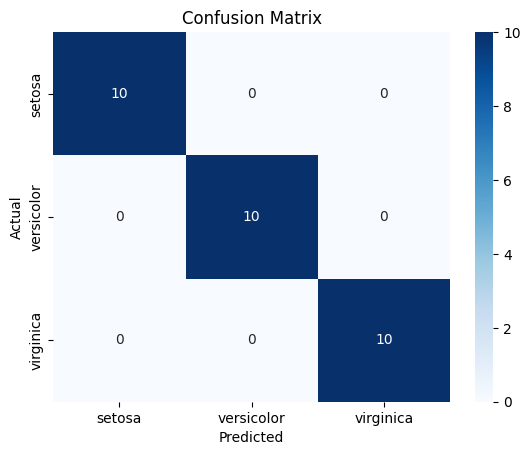

In [66]:
# Plot confusion matrix
y_pred = knn_cv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=categories, index=categories)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()